In [5]:
# importanto as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

from scipy import stats

local = f'{os.path.abspath("")}'
print(local)

C:\Users\JOAO NOTE WORK\Documents\GitHub\Pyhton-Journey-and-Machine-Learning\Aula12


In [6]:
# lendo a base de dados
imoveis= pd.read_csv(f"{local}\\Arquivo_Valorizacao_Ambiental.csv", sep=';')


In [7]:
# visualizando alguns dados
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [8]:
# visualizando formatos das variáveis
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Ordem     172 non-null    int64
 1   Valor     172 non-null    int64
 2   Area      172 non-null    int64
 3   IA        172 non-null    int64
 4   Andar     172 non-null    int64
 5   Suites    172 non-null    int64
 6   Vista     172 non-null    int64
 7   DistBM    172 non-null    int64
 8   Semruido  172 non-null    int64
 9   AV100m    172 non-null    int64
dtypes: int64(10)
memory usage: 13.6 KB


In [9]:
# Avaliando a quantidade de NA´s (missing)
#zip armazera em uma serie os varios dados

pd.DataFrame(zip(imoveis.isnull().sum(),imoveis.isnull().sum()/len(imoveis)), columns=['Count', 'Proportion'], index=imoveis.columns)


,Count,Proportion
Ordem,0,0.0
Valor,0,0.0
Area,0,0.0
IA,0,0.0
Andar,0,0.0
Suites,0,0.0
Vista,0,0.0
DistBM,0,0.0
Semruido,0,0.0
AV100m,0,0.0


In [6]:
# descritivo das variáveis: medidas resumo
imoveis.describe().round(2) 


,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


Text(0.5, 1.0, 'Histograma Valor')

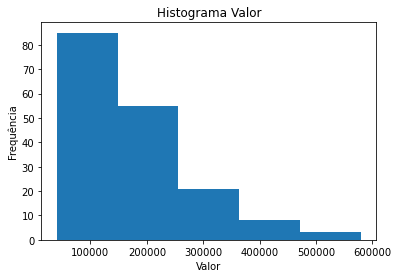

In [7]:
# Histograma da variável Valor  Variável target / Variável Dependente / Supervisionar
#variavel valor alvo
#outras variaveis são preditoras
plt.hist(imoveis['Valor'], bins=5)
plt.ylabel('Frequência')
plt.xlabel('Valor')
plt.title('Histograma Valor')



Text(0, 0.5, 'Número de casos')

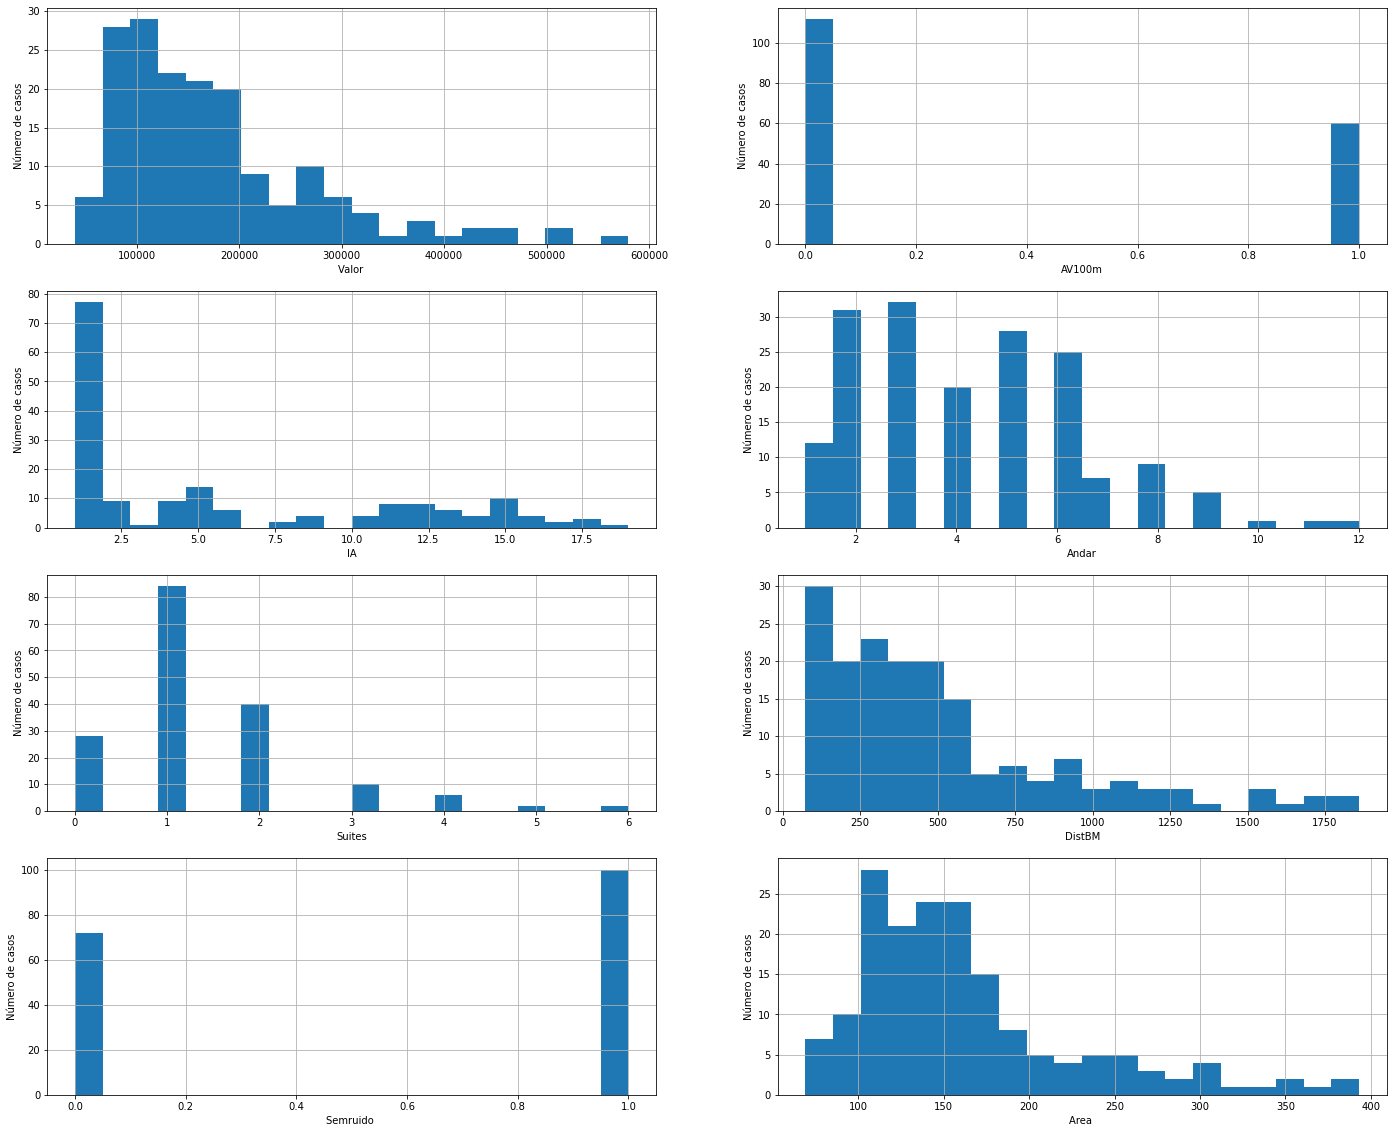

In [10]:
# avaliando a distribuicaoo de cada variavel numérica 

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = imoveis['Valor'].hist(bins=20)
fig.set_xlabel('Valor ')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 2)
fig = imoveis['AV100m'].hist(bins=20)
fig.set_xlabel('AV100m')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 3)
fig = imoveis['IA'].hist(bins=20)
fig.set_xlabel('IA')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 4)
fig = imoveis['Andar'].hist(bins=20)
fig.set_xlabel('Andar')
fig.set_ylabel('Número de casos')


plt.subplot(4, 2, 5)
fig = imoveis['Suites'].hist(bins=20)
fig.set_xlabel('Suites')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 6)
fig = imoveis['DistBM'].hist(bins=20)
fig.set_xlabel('DistBM')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 7)
fig = imoveis['Semruido'].hist(bins=20)
fig.set_xlabel('Semruido ')
fig.set_ylabel('Número de casos')

plt.subplot(4, 2, 8)
fig = imoveis['Area'].hist(bins=20)
fig.set_xlabel('Area ')
fig.set_ylabel('Número de casos')


Text(0, 0.5, 'Suites')

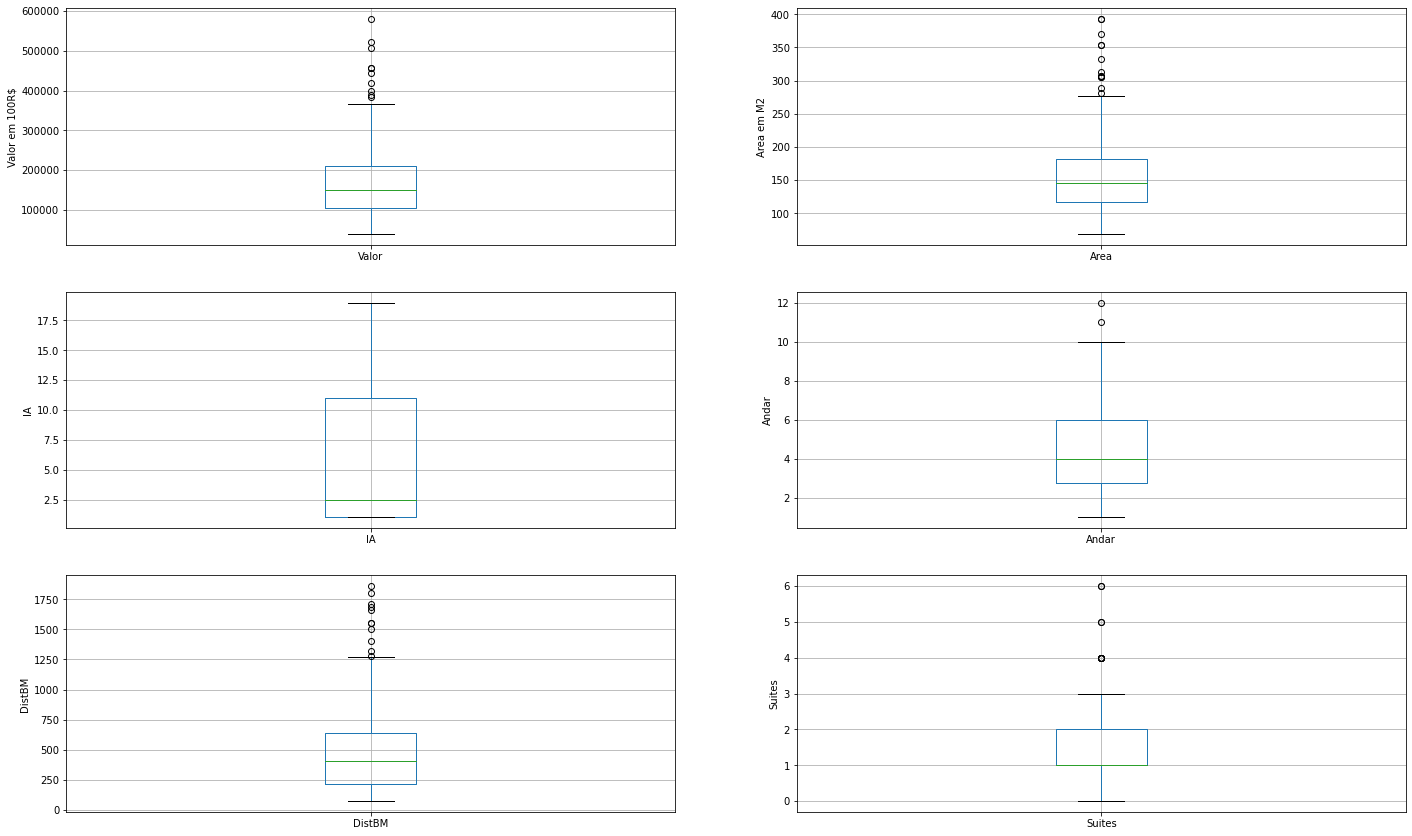

In [10]:
# Outra opção para variáveis quantitativas Boxplot: para visualizar Outliers

plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column='Valor')
fig.set_title('')
fig.set_ylabel('Valor em 100R$')


plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column='Area')
fig.set_title('')
fig.set_ylabel('Area em M2')


plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column='IA')
fig.set_title('')
fig.set_ylabel('IA')

plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column='Andar')
fig.set_title('')
fig.set_ylabel('Andar')

plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column='DistBM')
fig.set_title('')
fig.set_ylabel('DistBM')

plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column='Suites')
fig.set_title('')
fig.set_ylabel('Suites')




In [ ]:
# Importante nessa etapa é avaliar se tem alguma variável com presença de outliers ou daados extremos
# Antes de ir para a correlação avaliar o que fazer!!!!!!!!!!!corrigir, eliminar....

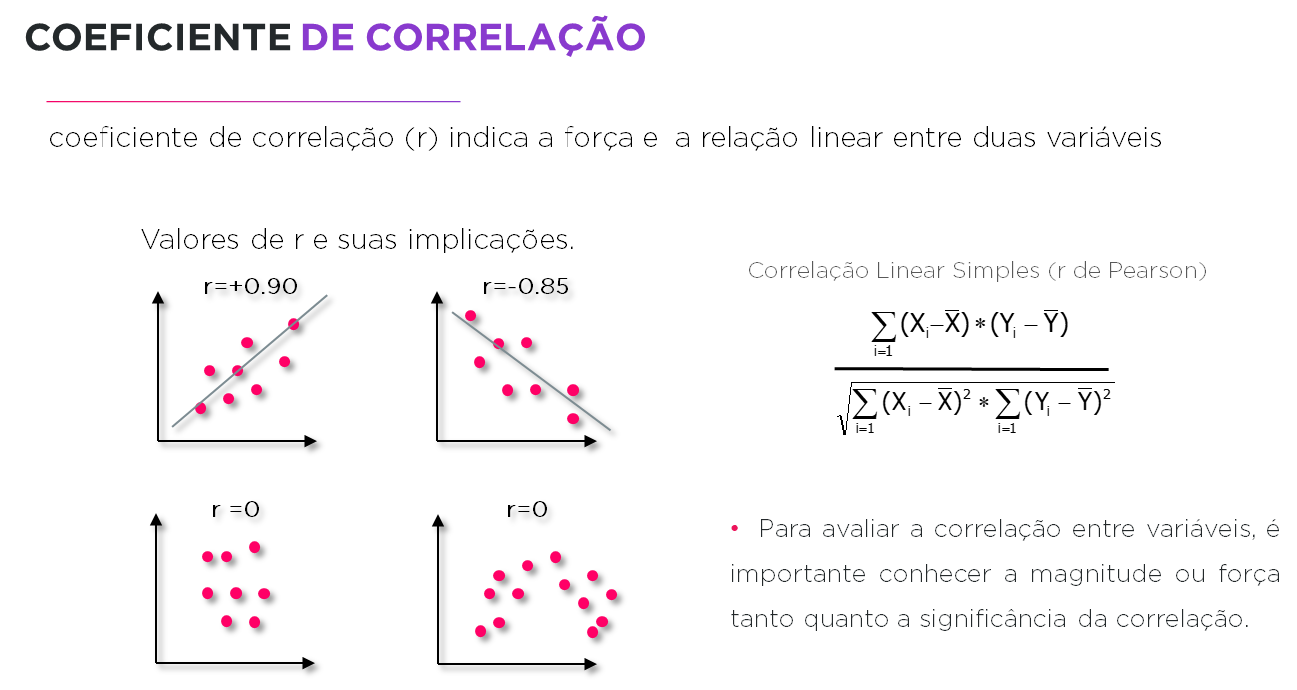

In [17]:
# Correlação de Pearson - quando as variáveis são núméricas quantitativas
# ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
# ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
# ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
# ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
# ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

#negativo = inversamente proporcional
#positivo = propocional
imoveis.corr().sort_values('Valor', ascending=False).round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
Valor,0.34,1.00,0.77,-0.33,0.31,0.72,0.27,-0.05,0.22,0.37
Area,-0.15,0.77,1.00,-0.15,0.16,0.53,0.09,-0.12,0.11,0.30
Suites,0.26,0.72,0.53,-0.32,0.23,1.00,0.04,-0.11,0.12,0.25
AV100m,-0.01,0.37,0.30,-0.14,0.22,0.25,0.34,-0.10,0.23,1.00
Ordem,1.00,0.34,-0.15,0.01,0.02,0.26,0.15,0.05,0.01,-0.01
Andar,0.02,0.31,0.16,-0.38,1.00,0.23,0.01,0.25,0.02,0.22
Vista,0.15,0.27,0.09,-0.01,0.01,0.04,1.00,-0.10,0.04,0.34
Semruido,0.01,0.22,0.11,-0.14,0.02,0.12,0.04,0.40,1.00,0.23
DistBM,0.05,-0.05,-0.12,-0.01,0.25,-0.11,-0.10,1.00,0.40,-0.10
IA,0.01,-0.33,-0.15,1.00,-0.38,-0.32,-0.01,-0.01,-0.14,-0.14


In [19]:
# Correlação de Pearson - quando as variáveis são núméricas quantitativas
corr = imoveis.corr(method='pearson').sort_values('Valor', ascending=False).round(2)
corr

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
Valor,0.34,1.00,0.77,-0.33,0.31,0.72,0.27,-0.05,0.22,0.37
Area,-0.15,0.77,1.00,-0.15,0.16,0.53,0.09,-0.12,0.11,0.30
Suites,0.26,0.72,0.53,-0.32,0.23,1.00,0.04,-0.11,0.12,0.25
AV100m,-0.01,0.37,0.30,-0.14,0.22,0.25,0.34,-0.10,0.23,1.00
Ordem,1.00,0.34,-0.15,0.01,0.02,0.26,0.15,0.05,0.01,-0.01
Andar,0.02,0.31,0.16,-0.38,1.00,0.23,0.01,0.25,0.02,0.22
Vista,0.15,0.27,0.09,-0.01,0.01,0.04,1.00,-0.10,0.04,0.34
Semruido,0.01,0.22,0.11,-0.14,0.02,0.12,0.04,0.40,1.00,0.23
DistBM,0.05,-0.05,-0.12,-0.01,0.25,-0.11,-0.10,1.00,0.40,-0.10
IA,0.01,-0.33,-0.15,1.00,-0.38,-0.32,-0.01,-0.01,-0.14,-0.14


Text(0.5, 1.0, 'Correlation between different fearures')

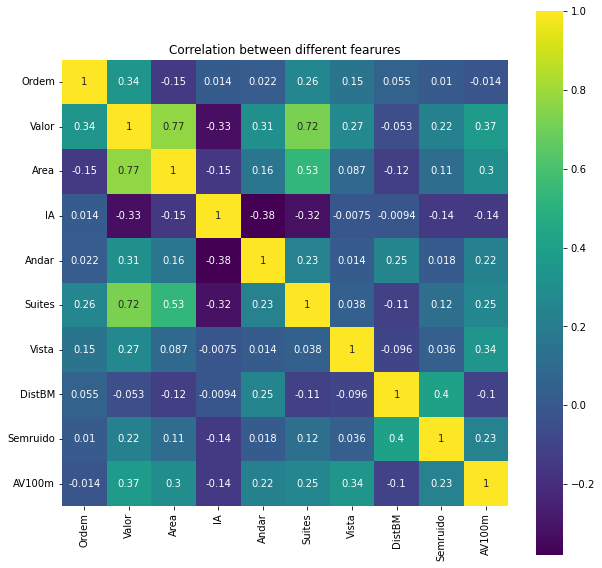

In [20]:
correlation = imoveis.corr()
plt.figure(figsize=(10,10))
sb.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

Text(0.5, 1.0, ' Scatter plot Valor versus Area em m2')

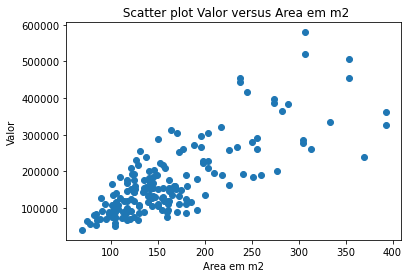

In [16]:
# Em uma análise descritiva sempre utilizar a variável Target - De acordo com o objetivo
# gráfico quando a variável preditora quantitativa 

# Gráfico de dispersão ou scatterplot
plt.scatter('Area', 'Valor', data=imoveis)
plt.xlabel("Area em m2")
plt.ylabel("Valor")
plt.title(" Scatter plot Valor versus Area em m2")

Text(0.5, 3.1999999999999886, 'Suites')

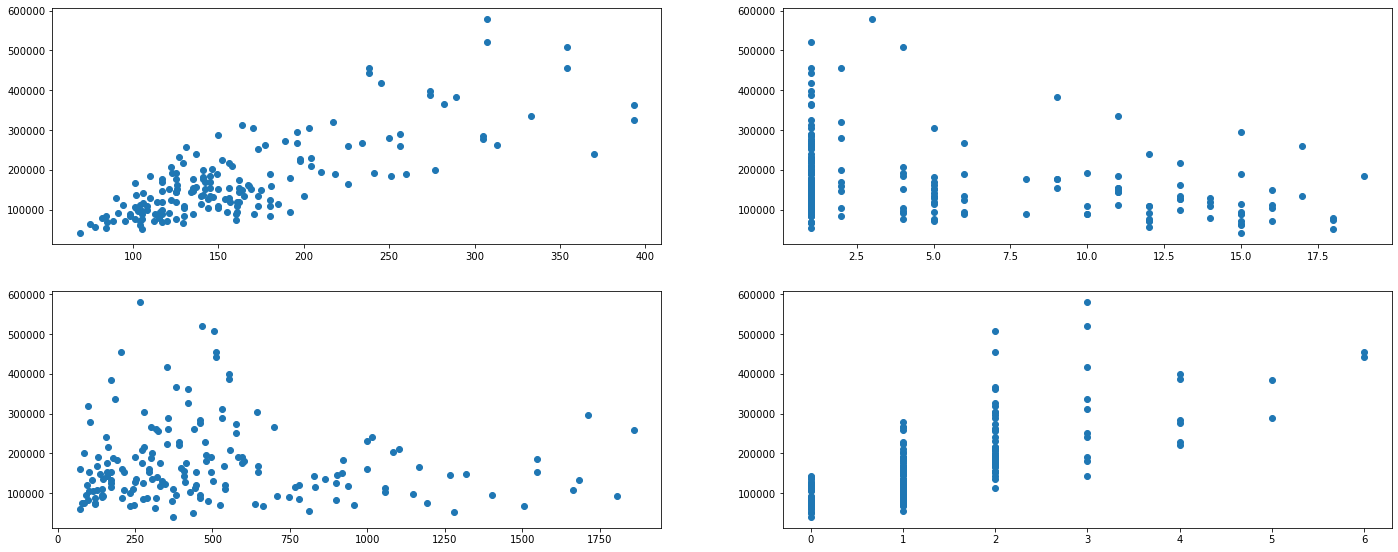

In [19]:
# Variáveis Preditoras/Independentes quantitativas com a variável Target


plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)

plt.scatter(imoveis['Area'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('Area')

plt.subplot(4, 2, 2)

plt.scatter(imoveis['IA'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('IA')


plt.subplot(4, 2, 3)

plt.scatter(imoveis['DistBM'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('DistBM')


plt.subplot(4, 2, 4)

plt.scatter(imoveis['Suites'], imoveis['Valor'], marker='o');
fig.set_title('Analise')
fig.set_ylabel('Valor')
fig.set_xlabel('Suites')


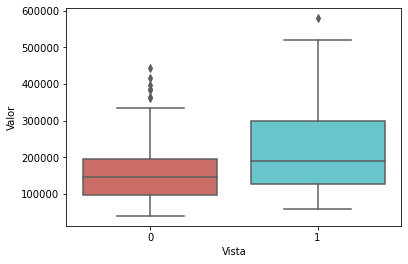

In [24]:
# Variáveis qualitativa com a variável Target

# Boxplot da variável Valor versus a variável Vista
sb.boxplot(x='Vista', y='Valor', data=imoveis, palette='hls');

<AxesSubplot:xlabel='Semruido', ylabel='Valor'>

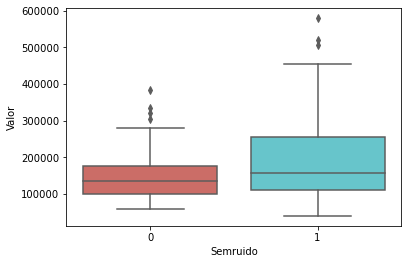

In [21]:
# Boxplot da variável Valor versus a variável Semruido
sb.boxplot(x='Semruido', y='Valor', data=imoveis, palette='hls')

<AxesSubplot:xlabel='AV100m', ylabel='Valor'>

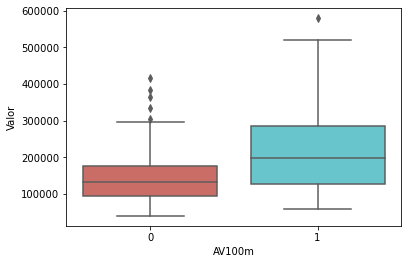

In [22]:
# Boxplot da variável Valor versus a variável AV100m
sb.boxplot(x='AV100m', y='Valor', data=imoveis, palette='hls')

In [ ]:
# Teste qui-quadrado é utilizado para descobrir associação entre duas variáveis qualitativas
# transformar a variável Valor do Imovel em qualitativa --> faixa valor (qualitativa ordinal) vs Semruido(qualitativa ordinal)
# criar a faixa_vlr você usar os quartis 

In [23]:
# Criar uma variável outlier_renda no Data Frame, sendo 0 = não outlier, 1= outlier e 2 = ponto extremo 
#minimo = min.(df['total'])   
Q1 =  np.percentile(imoveis['Valor'], 25)
Q2 =  np.percentile(imoveis['Valor'], 50)
Q3 =  np.percentile(imoveis['Valor'], 75)
maximo = max(imoveis['Valor'])    
print(Q1, Q2, Q3, maximo)


104750.0 149000.0 209250.0 579840


In [24]:
imoveis.loc[(imoveis.Valor >= 0) & (imoveis.Valor <= Q1), 'fx_total']=1.0
imoveis.loc[(imoveis.Valor > Q1) & (imoveis.Valor <= Q2), 'fx_total']=2.0
imoveis.loc[(imoveis.Valor>  Q2)  & (imoveis.Valor <=Q3), 'fx_total']=3.0
imoveis.loc[(imoveis.Valor >  Q3) & (imoveis.Valor <= maximo), 'fx_total']=4.0

In [25]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ordem     172 non-null    int64  
 1   Valor     172 non-null    int64  
 2   Area      172 non-null    int64  
 3   IA        172 non-null    int64  
 4   Andar     172 non-null    int64  
 5   Suites    172 non-null    int64  
 6   Vista     172 non-null    int64  
 7   DistBM    172 non-null    int64  
 8   Semruido  172 non-null    int64  
 9   AV100m    172 non-null    int64  
 10  fx_total  172 non-null    float64
dtypes: float64(1), int64(10)
memory usage: 14.9 KB


In [26]:
# crosstab tabela cruzada entre duas variáveis qualitativas

pd.crosstab(imoveis.fx_total,imoveis.Semruido, margins=True)

Semruido,0,1,All
fx_total,,,
1.0,20,23,43
2.0,22,21,43
3.0,21,22,43
4.0,9,34,43
All,72,100,172


In [29]:
# Uma variável sem_ruído
(imoveis.Semruido.value_counts() / imoveis.shape[0]) * 100

1    58.139535
0    41.860465
Name: Semruido, dtype: float64

In [27]:
table = pd.crosstab(imoveis.fx_total,imoveis.Semruido)

In [31]:
print(table)

Semruido   0   1
fx_total        
1.0       20  23
2.0       22  21
3.0       21  22
4.0        9  34


In [32]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [33]:

stat, p, dof, expected = chi2_contingency(table)
p


0.014685713198671485

####   Teste de hipótese:
    H0: não há relação entre valor e ruído
    H1: há relação entre valor e ruído
    α = 0,05 (5%)

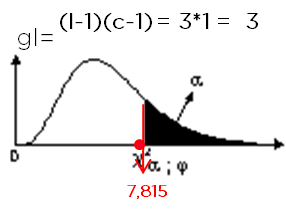

In [34]:
print('Graus de liberdade: dof=%d' % dof)

print('\n Tabela Esperada:')
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)

print('\n probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
	print('\n Dependent (reject H0)')
else:
	print('\n Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('\n significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
	print('\n Dependent (reject H0)')
else:
	print('\n Independent (fail to reject H0)')

Graus de liberdade: dof=3

 Tabela Esperada:
[[18. 25.]
 [18. 25.]
 [18. 25.]
 [18. 25.]]

 probability=0.950, critical=7.815, stat=10.511

 Dependent (reject H0)

 significance=0.050, p=0.015

 Dependent (reject H0)


In [31]:
!pip install researchpy
import researchpy

In [32]:
results1 = researchpy.crosstab(imoveis['fx_total'],imoveis['Semruido'], test='chi-square')

In [37]:
results1

(         Semruido          
 Semruido        0    1  All
 fx_total                   
 1.0            20   23   43
 2.0            22   21   43
 3.0            21   22   43
 4.0             9   34   43
 All            72  100  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =   10.5111
 1                    p-value =    0.0147
 2                 Cramer's V =    0.2472)

In [33]:
results2 = researchpy.crosstab(imoveis['fx_total'],imoveis['Vista'], test='chi-square')

In [39]:
results2

(         Vista         
 Vista        0   1  All
 fx_total               
 1.0         41   2   43
 2.0         36   7   43
 3.0         39   4   43
 4.0         32  11   43
 All        148  24  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =    8.9099
 1                    p-value =    0.0305
 2                 Cramer's V =    0.2276)

In [34]:
results3 = researchpy.crosstab(imoveis['fx_total'],imoveis['AV100m'], test='chi-square')

In [41]:
results3

(         AV100m         
 AV100m        0   1  All
 fx_total                
 1.0          36   7   43
 2.0          30  13   43
 3.0          31  12   43
 4.0          15  28   43
 All         112  60  172,
                 Chi-square test  results
 0  Pearson Chi-square ( 3.0) =   25.1857
 1                    p-value =    0.0000
 2                 Cramer's V =    0.3827)

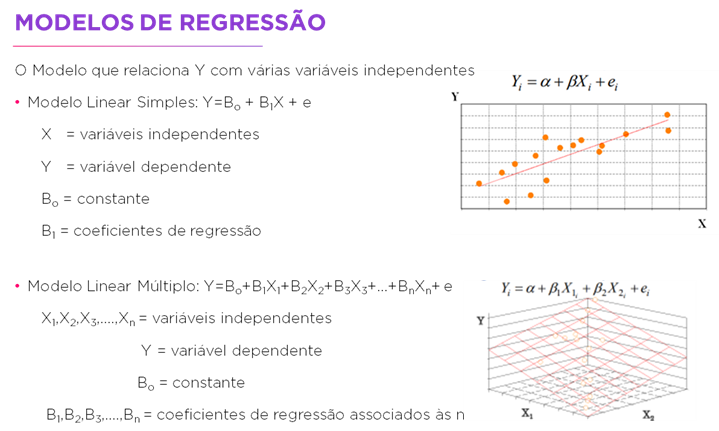

In [35]:
# Regressão linear múltipla
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html


In [36]:
# Ajustar a Regressão Linear  
# lm =linear model para variavel quantitativa

X = imoveis[['Area','Suites', 'IA', 'Semruido', 'Vista', 'Andar','AV100m']]

y = imoveis[['Valor']]



In [37]:
# fit é a função de estimação 
lm.fit(X,y)


LinearRegression()

In [38]:
# Intercepto do modelo (b0)

print(lm.intercept_)

print(lm.coef_)

[-34274.27333405]
[[  778.10497991 34282.77112767 -1214.85754824 20514.61710656
  59800.83786335  4637.10437006  -992.23696367]]


In [39]:
# Os coeficientes do modelo (b1,b2,b3....)

coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)
coefficients

,0,0
0,Area,778.104980
1,Suites,34282.771128
2,IA,-1214.857548
3,Semruido,20514.617107
4,Vista,59800.837863
5,Andar,4637.104370
6,AV100m,-992.236964


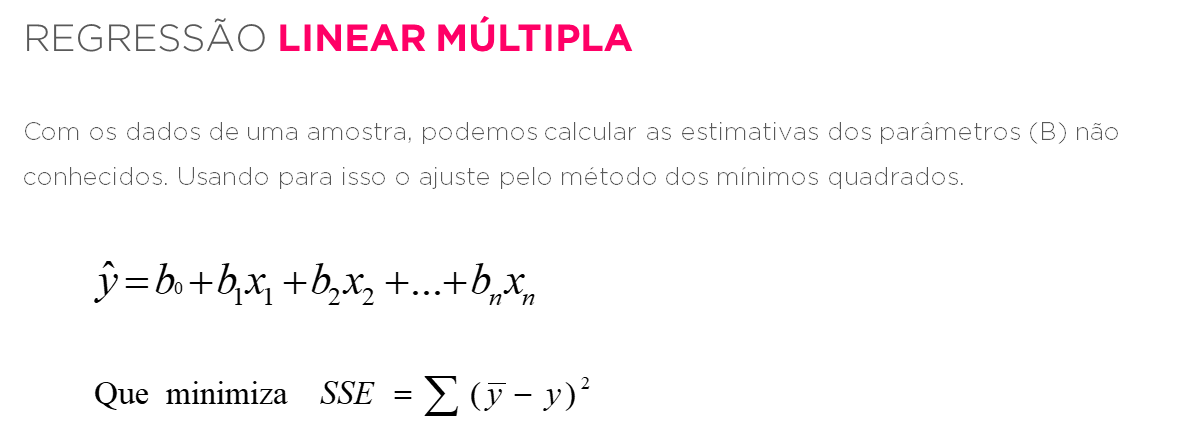

In [ ]:
# Utilizando o sklearn
# Selecionar todas as variáveis preditoras no modelo
# Selecionar as variáveis preditoras e a resposta

# newdf = df[df.columns[2:4]]  # Remember, Python is 0-offset! The "3rd" entry is at slot 2.


In [9]:
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Ordem     172 non-null    int64
 1   Valor     172 non-null    int64
 2   Area      172 non-null    int64
 3   IA        172 non-null    int64
 4   Andar     172 non-null    int64
 5   Suites    172 non-null    int64
 6   Vista     172 non-null    int64
 7   DistBM    172 non-null    int64
 8   Semruido  172 non-null    int64
 9   AV100m    172 non-null    int64
dtypes: int64(10)
memory usage: 13.6 KB


In [10]:

X = imoveis[imoveis.columns[2:10]]

y = imoveis['Valor']

In [12]:
from sklearn.model_selection import train_test_split

# random_state é o número aleatório usado para sortear as amostras. O seu uso é opcional.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.05, random_state = 101)

In [13]:
# importar bibliotecas
import statsmodels.api as sm
from scipy import stats

In [14]:
#Modelo de regressão linear múltipla
# regression.linear_model.OLS Ordinary Least Squares

X_ = sm.add_constant(X_train)

model = sm.OLS(y_train, X_).fit()

print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     84.51
Date:                Wed, 11 May 2022   Prob (F-statistic):           2.08e-52
Time:                        20:26:16   Log-Likelihood:                -1971.0
No. Observations:                 163   AIC:                             3960.
Df Residuals:                     154   BIC:                             3988.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.966e+04   1.39e+04     -2.844      0.0

In [15]:
# Voltando na base
imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Ordem     172 non-null    int64
 1   Valor     172 non-null    int64
 2   Area      172 non-null    int64
 3   IA        172 non-null    int64
 4   Andar     172 non-null    int64
 5   Suites    172 non-null    int64
 6   Vista     172 non-null    int64
 7   DistBM    172 non-null    int64
 8   Semruido  172 non-null    int64
 9   AV100m    172 non-null    int64
dtypes: int64(10)
memory usage: 13.6 KB


In [16]:
# Secionando as variáveis significantes
X_train, X_test, y_train, y_test = train_test_split(imoveis.drop(['Valor','Ordem', 'DistBM', 'AV100m'],axis=1),imoveis['Valor'],test_size=0.05, random_state=17)



In [17]:
#Modelo de regressão linear múltipla
# regression.linear_model.OLS Ordinary Least Squares

X_ = sm.add_constant(X_train)

modelo = sm.OLS(y_train, X_).fit()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  Valor   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     112.3
Date:                Wed, 11 May 2022   Prob (F-statistic):           4.98e-54
Time:                        20:43:19   Log-Likelihood:                -1972.7
No. Observations:                 163   AIC:                             3959.
Df Residuals:                     156   BIC:                             3981.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.319e+04   1.39e+04     -2.392      0.0

    Na saída da regressãolinear as medidas mais importantes para nós neste momento são o R2 ajustado, a estatística de teste F, o p-valor dessa estatística e, caso queiramos comparar diferentes modelos, o log-likelihood, o Akaike Information Criterion (AIC) e o Bayesian Information Criterion (BIC).
    
    A avaliação da qualidade de ajuste da reta de regressão que é obtida atráves de Soma de Quadrados de Resíduos (SQR) e R2 RQuadrado). Também, pode-se usar a estatística F que é usado para testar se pelo menos uma variável preditora possui um coeficiente diferente de zero.
    
    Coeficiente de Determinação (R2)
    O coeficiente de determinação ou R2, mede a proporção de variabilidade total em Y que pode ser explicada pela reta de regressão linear com as variáveis preditoras, e assume sempre valores de 0 e 1. Se R2 é proximo de 1, indica que uma grande proporção da variabilidade na resposta foi explicada pela regressão e ´quando R2 é próximo de 0 indica que a regressão não explicou grande parte da variabilidade na resposta.

       Neste estudo, R2= 0.805, 81% da variação total do valor do imóvel é explicada pela equação de regressão estimada tendo as variáveis explicativas acima.

In [18]:
# Importar a biblioteca
# Medidas de erro 

# Utilizado quando vamos comparar vários modelos

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [19]:
# Calculando o valor predito da variável resposta na amostra treino  
y_train_pred = modelo.predict(X_)


In [20]:
y_train_pred

97     411289.841286
73     183290.796106
101    359133.802637
138    158609.380767
112    154595.794229
           ...      
57     295523.436828
150    154007.302765
134    119032.258952
143    401039.753741
111    149824.828492
Length: 163, dtype: float64

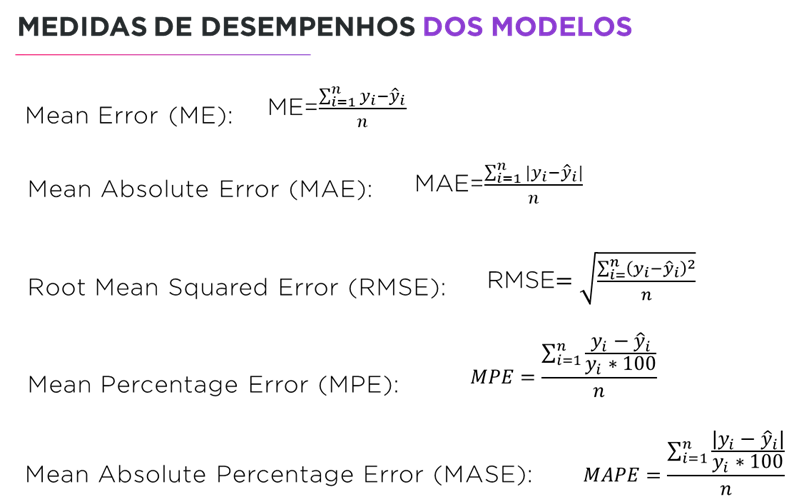

In [21]:
# Medidas de erro na amostra treino 
me1   = round((y_train-y_train_pred).mean(),2)
mae1  = (mean_absolute_error(y_train, y_train_pred)).round(2)
mse1  = (mean_squared_error(y_train, y_train_pred)).round(2)
rmse1  = (np.sqrt(mean_squared_error(y_train, y_train_pred))).round(2)
mpe1  = round(((y_train - y_train_pred)/y_train).mean(),2)
mape1  =  round((mae1/y_train).mean(),2) 


In [22]:
list1 = [me1, mae1,mse1,rmse1,mpe1, mape1]
 
pd.DataFrame({"treino":list1})

,treino
0,-0.000000e+00
1,3.398507e+04
2,1.904343e+09
3,4.363878e+04
4,-5.000000e-02
5,2.500000e-01


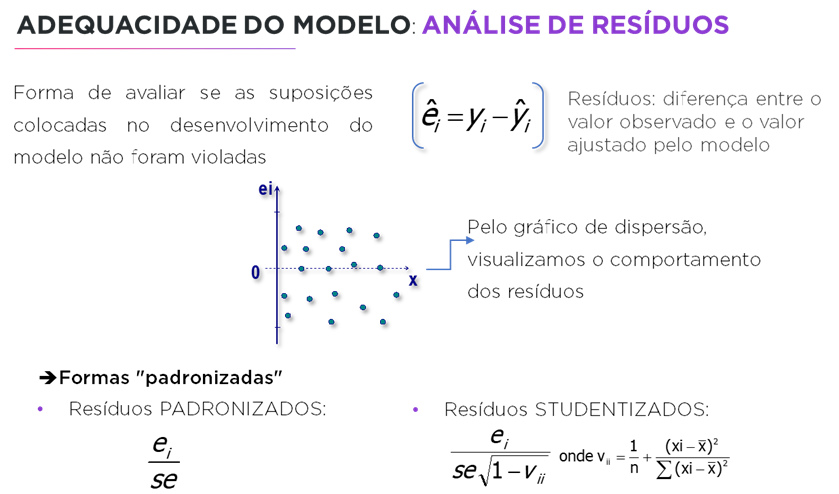

    Gráficos de Diagnóstico dos Resíduos
    
    Residuals vs Fitted - indica a existência de padrões não lineares nos resíduos. Uma das suposições matemáticas na construção de um modelo usando Mínimos Quadrados é que os dados podem ser ajustados por uma linha. Se essa suposição for válida e os dados puderem ser ajustados por um modelo linear, uma linha aproximadamente horizontal sem padrões aparecerá no gráfico.

    Normal Q-Q - examina se os resíduos são normalmente distribuídos. É bom que os pontos residuais sigam a linha reta.

    Homoscedasticidade - verifica a homogeneidade de variância dos resíduos. A linha horizontal com pontos igualmente dispersos é uma boa indicação de homoscedasticidade.

    Residuals vs Leverage - identifica casos influentes, ou seja, valores extremos que podem influenciar os resultados da regressão quando incluídos ou excluídos da análise.

    Antes de se construir os gráficos, em primeiro construir-se-á o modelo de resíduo para cada diagnóstico.

In [23]:
# Construção de diagnóstico para os gráficos
modelo_ajust_y = modelo.fittedvalues # Valores do modelo ajustados
modelo_residuos = modelo.resid # Residuos
modelo_norm_resid = modelo.get_influence().resid_studentized_internal # Residuos normalizados
modelo_norm_resid_abs = np.sqrt(np.abs(modelo_norm_resid)) # Quadrados dos residuos normalizados
modelo_outliers = modelo.get_influence().hat_matrix_diag # Outliers
distancia_cook = modelo.get_influence().cooks_distance[0] # Distancia de Cook

In [24]:
modelo_ajust_y

97     411289.841286
73     183290.796106
101    359133.802637
138    158609.380767
112    154595.794229
           ...      
57     295523.436828
150    154007.302765
134    119032.258952
143    401039.753741
111    149824.828492
Length: 163, dtype: float64

In [25]:
modelo_norm_resid 

array([ 2.2658018 , -0.6176079 ,  0.90192665,  0.57826246,  0.30324301,
        0.08733108, -2.65905328,  0.89056207,  0.21103679, -0.12178059,
        1.31893803,  0.95564402,  1.76059118, -0.79159888,  0.91507336,
        0.22104132, -1.64617778, -0.79426172, -0.73600286, -0.85429598,
        0.90899856, -0.62635707,  0.77066236,  0.96148945,  1.32919912,
        0.38497807, -1.04031764,  1.01815431,  0.51518754, -0.05990151,
        0.25130342, -0.3689997 ,  0.22329018,  0.79494144, -0.64852599,
        0.55375408, -0.45150593,  0.62685941,  0.57331132,  1.11697336,
       -1.43341515, -0.0691363 ,  0.04530721,  0.69791234, -0.58829223,
       -0.23305625,  0.04879424,  2.7218755 ,  0.40837794,  1.28224326,
       -0.86131139,  0.38325881,  1.34527586, -0.27041238,  0.74201239,
        0.97065315, -0.09020728, -0.24562223,  1.93901894,  0.80448011,
        0.51512327,  0.28093371,  1.79513341, -0.42446621, -0.22381731,
       -1.66536761,  0.70410937, -0.07873341,  0.98983159, -0.16

In [26]:
# um dataframe com a variável observado e estimado pelo modelo 

dataframe = pd.concat([y_train, modelo_ajust_y], axis=1)

In [27]:
dataframe

,Valor,0
97,507360,411289.841286
73,156000,183290.796106
101,398477,359133.802637
138,184000,158609.380767
112,168000,154595.794229
...,...,...
57,221496,295523.436828
150,136000,154007.302765
134,120000,119032.258952
143,442992,401039.753741


Text(0, 0.5, 'Estimado')

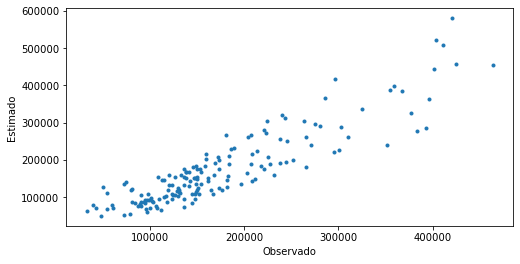

In [28]:
plt.figure(figsize=(8, 4))
plt.scatter(y_train_pred ,y_train, marker='.')
plt.xlabel("Observado")
plt.ylabel("Estimado")


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

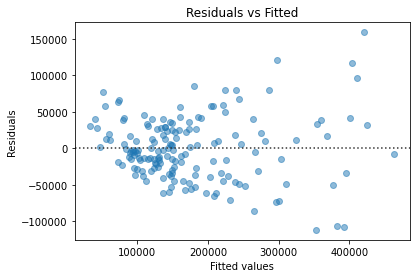

In [29]:
### Teste de Linearidade
### Nestes gráficos a presença de um padrão nos resíduos pode indicar um problema com algum aspecto do modelo linear.


plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sb.residplot(modelo_ajust_y, dataframe.columns[-0], data=dataframe,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
                          
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

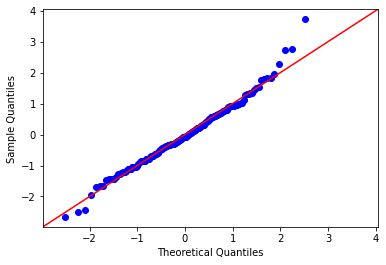

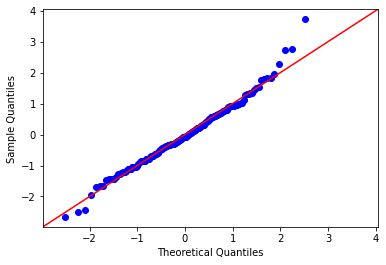

In [30]:
### Teste de Normalidade
### O gráfico de resíduos pode ser usado para verificar visualmente a suposição de normalidade.
### Sendo que para que se aceite que os resíduos estão normalmente distribuidos deve seguir aproximadamente uma linha reta.    
    
sm.qqplot(modelo_norm_resid, line='45')


    Teste de normalidade dos resíduos Shapiro-Wilk Test Teste de hipótese:

    H0: Distribuição = Normal H1: Distribuição <> Normal

    Erro de decisâo: 0,05 ou 5%

    Critério de decisâo: 
        Se p-value < erro de decisão então rejeito H0.
        Se p-value >= erro de decisão então não rejeito H0

In [31]:
shapiro_test = stats.shapiro(modelo_norm_resid)
shapiro_test
#(statistic, p-value)

ShapiroResult(statistic=0.9870348572731018, pvalue=0.135940819978714)

    Qual a sua conclusão?
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(4.0, 463598.40361169964)

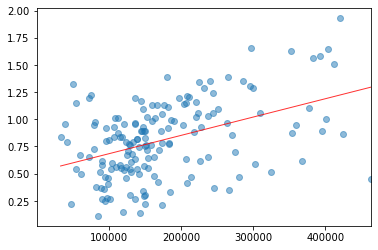

In [32]:
### Teste de Homoscedasticidade
### O gráfico Scale-Location mostra os resíduos que são distribuídos igualmente ao longo dos intervalos de preditores.
### Uma linha horizontal com pontos igualmente dispersos, é bom.

plot_lm_3 = plt.figure()
plt.scatter(modelo_ajust_y, modelo_norm_resid_abs, alpha=0.5);
sb.regplot(modelo_ajust_y, modelo_norm_resid_abs,
            scatter=False,
            ci=False,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_xlim(4, max(modelo_ajust_y)+0.05)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 0.16272434482737416)

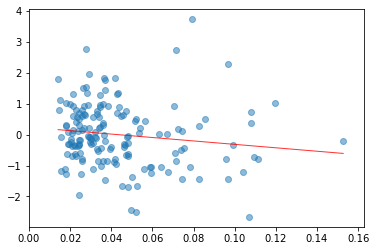

In [33]:
### Pontos influentes e valores extremos

### o gráfico de dispersão pode nos mostrar quais observações não correspondem ao modelo ajustado. 
### Outliers:

### para uma melhor detecção de outliers em Y, diversas formas “padronizadas” foram propostas.
### Para Resíduos Normalizados, se os erros têm distribuição normal, então aproximadamente 95% dos resíduos normalizado (di)
### devem estar no intervalo de (-2,2). 
#### Note que, resíduos fora desse intervalo podem indicar a presença de outliers.

plot_lm_4 = plt.figure();
plt.scatter(modelo_outliers, modelo_norm_resid, alpha=0.5);
sb.regplot(modelo_outliers, modelo_norm_resid,
            scatter=False,
            ci=False,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(modelo_outliers)+0.01)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-3.0, 3.0)

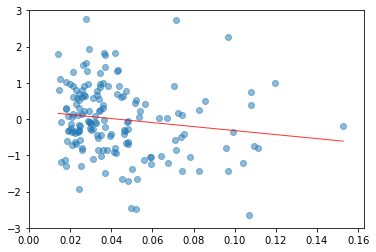

In [34]:
plot_lm_4 = plt.figure();
plt.scatter(modelo_outliers, modelo_norm_resid, alpha=0.5);
sb.regplot(modelo_outliers, modelo_norm_resid,
            scatter=False,
            ci=False,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(modelo_outliers)+0.01);
plot_lm_4.axes[0].set_ylim(-3, 3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


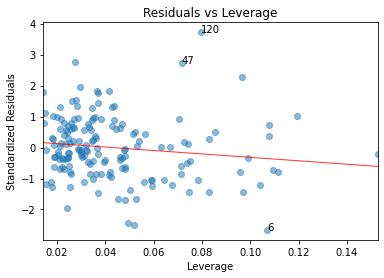

In [35]:
plot_lm_4 = plt.figure();
plt.scatter(modelo_outliers, modelo_norm_resid, alpha=0.5);
sb.regplot(modelo_outliers, modelo_norm_resid,
            scatter=False,
            ci=False,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(distancia_cook), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i,
                                 xy=(modelo_outliers[i],
                                     modelo_norm_resid[i]))

In [ ]:
### O gráfico (Residual vs Leverage) mostra os três principais pontos mais extremos (120 e 47), e 6 com resíduos padronizados acima de −2.
### No entanto, há discrepantes pontos que excedam 3 desvios padrão, 47 e 120.